In [1]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Read CSV and Display") \
    .getOrCreate()

24/05/15 15:10:09 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
# Read CSV file into Spark DataFrame
df_spark = spark.read.csv("/ProjectTweets.csv", header=False, inferSchema=True)

In [3]:
# Specify column names
column_names = ['Label', 'ID', 'Date', 'Query', 'User', 'Tweet']

In [4]:
# Assign column names to the DataFrame
df_spark = df_spark.toDF(*column_names)

In [5]:
# Display the first few rows of the DataFrame
df_spark.show(10)

+-----+----------+--------------------+--------+---------------+--------------------+
|Label|        ID|                Date|   Query|           User|               Tweet|
+-----+----------+--------------------+--------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|    2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|    3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|    4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|    5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|    6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|    7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|    8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4

In [6]:
total_count = df_spark.count()
print("Total number of rows in the DataFrame:", total_count)

Total number of rows in the DataFrame: 1600000


In [7]:
# Assuming `df` is your Spark DataFrame
first_7000_rows = df_spark.limit(7000)

# Show the first few rows of the limited DataFrame
first_7000_rows.show()

+-----+----------+--------------------+--------+---------------+--------------------+
|Label|        ID|                Date|   Query|           User|               Tweet|
+-----+----------+--------------------+--------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|    2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|    3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|    4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|    5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|    6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|    7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|    8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4

In [8]:
total_count = first_7000_rows.count()
print("Total number of rows in the DataFrame:", total_count)

Total number of rows in the DataFrame: 7000


In [9]:
df_spark=first_7000_rows

In [10]:
df_spark.printSchema()
df_spark.show(5)

root
 |-- Label: integer (nullable = true)
 |-- ID: long (nullable = true)
 |-- Date: string (nullable = true)
 |-- Query: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Tweet: string (nullable = true)

+-----+----------+--------------------+--------+---------------+--------------------+
|Label|        ID|                Date|   Query|           User|               Tweet|
+-----+----------+--------------------+--------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|    2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|    3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|    4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+-----+----------+--------------------+--------+---------------+--------------------+
only

In [11]:
# Summary statistics
df_spark.describe().show()

24/05/15 15:10:33 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+--------------------+--------------------+--------+-------------------+--------------------+
|summary|             Label|                  ID|                Date|   Query|               User|               Tweet|
+-------+------------------+--------------------+--------------------+--------+-------------------+--------------------+
|  count|              7000|                7000|                7000|    7000|               7000|                7000|
|   mean|            3499.5|1.4686425165634286E9|                null|    null|       1.94049316E7|                null|
| stddev|2020.8702745764426|   497387.5108143534|                null|    null|2.212125858720179E7|                null|
|    min|                 0|          1467810369|Mon Apr 06 22:19:...|NO_QUERY|          007simple| AFI are not at r...|
|    max|              6999|          1469641846|Tue Apr 07 06:59:...|NO_QUERY|               zzap|ï¿½ber sick  Tryi...|
+-------+------------------+----

In [12]:
total_rows = df_spark.count()
print(f"Total number of rows: {total_rows}")

Total number of rows: 7000


In [13]:
columns_to_drop = ['ID', 'Query', 'User']  # Specify the columns you want to remove

In [14]:
# Drop columns that are not useful
df_cleaned = df_spark.drop(*columns_to_drop)

In [15]:
# Display the cleaned DataFrame
df_cleaned.show(10)  # Show the first 10 rows for example

+-----+--------------------+--------------------+
|Label|                Date|               Tweet|
+-----+--------------------+--------------------+
|    0|Mon Apr 06 22:19:...|@switchfoot http:...|
|    1|Mon Apr 06 22:19:...|is upset that he ...|
|    2|Mon Apr 06 22:19:...|@Kenichan I dived...|
|    3|Mon Apr 06 22:19:...|my whole body fee...|
|    4|Mon Apr 06 22:19:...|@nationwideclass ...|
|    5|Mon Apr 06 22:20:...|@Kwesidei not the...|
|    6|Mon Apr 06 22:20:...|         Need a hug |
|    7|Mon Apr 06 22:20:...|@LOLTrish hey  lo...|
|    8|Mon Apr 06 22:20:...|@Tatiana_K nope t...|
|    9|Mon Apr 06 22:20:...|@twittera que me ...|
+-----+--------------------+--------------------+
only showing top 10 rows



In [16]:
# Identify and remove duplicate rows based on all columns
df_no_duplicates = df_cleaned.dropDuplicates()

In [17]:
df_no_duplicates = df_cleaned.dropDuplicates(['Tweet'])

In [18]:
# Count the number of rows after removing duplicates
num_rows_without_duplicates = df_no_duplicates.count()

In [19]:
# Print the count of duplicate rows removed
num_duplicate_rows = df_cleaned.count() - num_rows_without_duplicates
print(f"Number of duplicate rows removed: {num_duplicate_rows}")

Number of duplicate rows removed: 12


In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

In [21]:
# Count the number of missing values (nulls) per column
missing_value_counts = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns]).show()

+-----+----+-----+
|Label|Date|Tweet|
+-----+----+-----+
|    0|   0|    0|
+-----+----+-----+



In [22]:
df_cleaned

DataFrame[Label: int, Date: string, Tweet: string]

In [23]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re
import string

In [24]:
# Define text cleaning function
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [25]:
# Register the text cleaning function as a Spark UDF
clean_text_udf = udf(text_clean_1, StringType())

In [26]:
# Apply the UDF to clean the 'text' column
cleaned_df = df_cleaned.withColumn('cleaned_text', clean_text_udf(df_cleaned['Tweet']))

In [27]:
# Show the cleaned DataFrame
cleaned_df.show(truncate=False)

+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|Label|Date                        |Tweet                                                                                                                |cleaned_text                                                                                                 |
+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|0    |Mon Apr 06 22:19:45 PDT 2009|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  |switchfoot   awww thats a bummer  you shoulda got d

In [28]:
# Define text cleaning function for Spark
def text_clean_2(text):
    text = re.sub('["“”...]', '', text)  # Remove quotes, ellipses, and other specified characters
    text = re.sub('\n', '', text)       # Remove newline characters
    return text

In [29]:
# Register the text_clean_2 function as a Spark UDF
clean_text2_udf = udf(text_clean_2, StringType())

In [30]:
# Apply the UDF to create a new column 'cleaned_text_new'
df_cleaned = cleaned_df.withColumn('cleaned_text_new', clean_text2_udf(col('cleaned_text')))


In [31]:
# Show the DataFrame with the new cleaned text column
df_cleaned.show(truncate=False)

+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+
|Label|Date                        |Tweet                                                                                                                |cleaned_text                                                                                                 |cleaned_text_new                                                                                             |
+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------

In [32]:
df_cleaned

DataFrame[Label: int, Date: string, Tweet: string, cleaned_text: string, cleaned_text_new: string]

In [33]:
# Get unique values from the 'cleaned_text_new' column using Spark SQL
unique_values = df_cleaned.select('cleaned_text_new').distinct().collect()

In [34]:
# Extract unique values from the collected DataFrame
unique_values_list = [row.cleaned_text_new for row in unique_values]


In [35]:
unique_values_list

['switchfoot   awww thats a bummer  you shoulda got david carr of third day to do it d',
 'is upset that he cant update his facebook by texting it and might cry as a result  school today also blah',
 'kenichan i dived many times for the ball managed to save   the rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 'nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there ',
 'kwesidei not the whole crew ',
 'need a hug ',
 'loltrish hey  long time no see yes rains a bit only a bit  lol  im fine thanks  hows you ',
 'tatianak nope they didnt have it ',
 'twittera que me muera  ',
 'spring break in plain city its snowing ',
 'i just repierced my ears ',
 'caregiving i couldnt bear to watch it  and i thought the ua loss was embarrassing     ',
 ' it it counts idk why i did either you never talk to me anymore ',
 'smarrison i wouldve been the first but i didnt have a gun    not really though zac snyders just a doucheclow

In [36]:
from pyspark.sql.types import FloatType
from textblob import TextBlob
import nltk
nltk.download('punkt')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/hduser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Define sentiment analysis function using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [38]:
# Register sentiment analysis function as a Spark UDF
sentiment_udf = udf(get_sentiment, FloatType())

In [39]:
# Apply sentiment analysis to each tweet and create a new column 'Sent'
df_with_sentiment = df_cleaned.withColumn('Sent', sentiment_udf(df_cleaned['Tweet']))

In [40]:
# Show the DataFrame with sentiment analysis results
df_with_sentiment.show(truncate=False)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-----------+
|Label|Date                        |Tweet                                                                                                                |cleaned_text                                                                                                 |cleaned_text_new                                                                                             |Sent       |
+-----+----------------------------+---------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------

In [41]:
df_with_sentiment.show(20)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----+--------------------+--------------------+--------------------+--------------------+-----------+
|Label|                Date|               Tweet|        cleaned_text|    cleaned_text_new|       Sent|
+-----+--------------------+--------------------+--------------------+--------------------+-----------+
|    0|Mon Apr 06 22:19:...|@switchfoot http:...|switchfoot   awww...|switchfoot   awww...| 0.21666667|
|    1|Mon Apr 06 22:19:...|is upset that he ...|is upset that he ...|is upset that he ...|        0.0|
|    2|Mon Apr 06 22:19:...|@Kenichan I dived...|kenichan i dived ...|kenichan i dived ...|        0.5|
|    3|Mon Apr 06 22:19:...|my whole body fee...|my whole body fee...|my whole body fee...|        0.2|
|    4|Mon Apr 06 22:19:...|@nationwideclass ...|nationwideclass n...|nationwideclass n...|     -0.625|
|    5|Mon Apr 06 22:20:...|@Kwesidei not the...|kwesidei not the ...|kwesidei not the ...|        0.2|
|    6|Mon Apr 06 22:20:...|         Need a hug |         need a

In [42]:
from pyspark.sql.functions import col, round
import matplotlib.pyplot as plt

In [43]:
df_with_sentiment.show(20)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----+--------------------+--------------------+--------------------+--------------------+-----------+
|Label|                Date|               Tweet|        cleaned_text|    cleaned_text_new|       Sent|
+-----+--------------------+--------------------+--------------------+--------------------+-----------+
|    0|Mon Apr 06 22:19:...|@switchfoot http:...|switchfoot   awww...|switchfoot   awww...| 0.21666667|
|    1|Mon Apr 06 22:19:...|is upset that he ...|is upset that he ...|is upset that he ...|        0.0|
|    2|Mon Apr 06 22:19:...|@Kenichan I dived...|kenichan i dived ...|kenichan i dived ...|        0.5|
|    3|Mon Apr 06 22:19:...|my whole body fee...|my whole body fee...|my whole body fee...|        0.2|
|    4|Mon Apr 06 22:19:...|@nationwideclass ...|nationwideclass n...|nationwideclass n...|     -0.625|
|    5|Mon Apr 06 22:20:...|@Kwesidei not the...|kwesidei not the ...|kwesidei not the ...|        0.2|
|    6|Mon Apr 06 22:20:...|         Need a hug |         need a

In [44]:
total_rows = df_with_sentiment.count()
print(f"Total number of rows: {total_rows}")

Total number of rows: 7000


In [45]:
import matplotlib.pyplot as plt

In [46]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
pd_distribution = df_with_sentiment.toPandas()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [47]:
pd_distribution.head()

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000
2,2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...,0.500000
3,3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200000
4,4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...,-0.625000


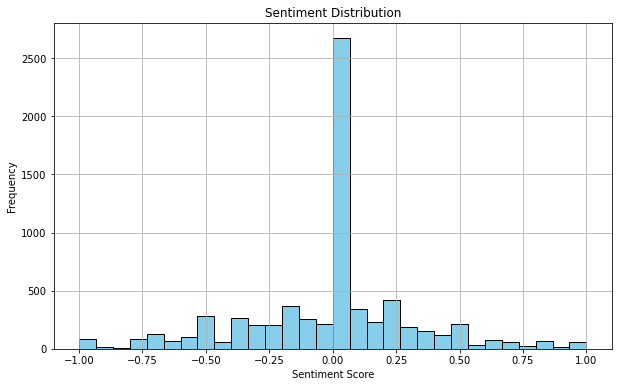

In [48]:
import matplotlib.pyplot as plt

# Plotting the sentiment distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(pd_distribution['Sent'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
df=pd_distribution

In [50]:
df.head(3)

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000
2,2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...,0.500000


In [51]:
# Adding a new column based on Polarity
df['Sentiment'] = df['Sent'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

df.head()

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent,Sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667,positive
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000,neutral
2,2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...,0.500000,positive
3,3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200000,positive
4,4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...,-0.625000,negative


In [52]:
import seaborn as sns

/tmp/ipykernel_13038/1807160620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment',data=df, palette='summer')


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

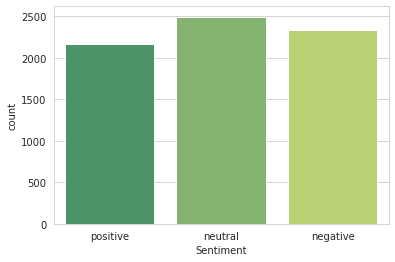

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=df, palette='summer')

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  # Example classifier (you can use any classifier here)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import time
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import time
import math
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-05-15 15:11:16.941111: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 15:11:17.301644: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 15:11:18.050690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 15:11:21.400478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
data= df.head(1000)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Label             1000 non-null   int32  
 1   Date              1000 non-null   object 
 2   Tweet             1000 non-null   object 
 3   cleaned_text      1000 non-null   object 
 4   cleaned_text_new  1000 non-null   object 
 5   Sent              1000 non-null   float32
 6   Sentiment         1000 non-null   object 
dtypes: float32(1), int32(1), object(5)
memory usage: 47.0+ KB


In [57]:
from sklearn.model_selection import train_test_split

# Assuming 'new' is the independent variable and 'Text' is the dependent variable
independent_var = data['cleaned_text_new']
dependent_var = data['Sentiment']

IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)

print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))

IV_train: 900
IV_test: 100
DV_train: 900
DV_test: 100


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Creating a pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TfidfVectorizer for feature extraction
    ('clf', LogisticRegression(solver='lbfgs'))  # Logistic Regression classifier
])

In [60]:
model = Pipeline([('vectorizer' , tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[26, 10,  6],
       [ 4, 28,  1],
       [ 3,  3, 19]])

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :", accuracy_score(predictions, DV_test))
print("Precision :", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall :", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy : 0.73
Precision : 0.7389672522599352
Recall : 0.73


In [62]:
example = ['good']
result = model.predict(example)

print(result)

['positive']


In [63]:
example = ['bad']
result = model.predict(example)

print(result)

['negative']


In [64]:
example = ['ever']
result = model.predict(example)

print(result)

['neutral']


In [65]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
data.head(2)

,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent,Sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667,positive
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000,neutral


In [67]:
# Extract the time series data (Sentiment) from DataFrame
sentiment_series = data['Sent']

In [68]:
# Create DataFrame from the data dictionary
df = pd.DataFrame(data)

In [69]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_13038/646168968.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'])


In [70]:
# Check available columns in the DataFrame
print(df.columns)

Index(['Label', 'Date', 'Tweet', 'cleaned_text', 'cleaned_text_new', 'Sent',
       'Sentiment'],
      dtype='object')


In [71]:
# Extract only 'Date' and 'Sent' columns if they exist in the DataFrame
if 'Date' in df.columns and 'Sent' in df.columns:
    date_sent_df = df[['Date', 'Sent']]
    print(date_sent_df)
else:
    print("The 'Date' or 'Sent' column does not exist in the DataFrame.")

                   Date      Sent
0   2009-04-06 22:19:45  0.216667
1   2009-04-06 22:19:49  0.000000
2   2009-04-06 22:19:53  0.500000
3   2009-04-06 22:19:57  0.200000
4   2009-04-06 22:19:57 -0.625000
..                  ...       ...
995 2009-04-06 23:28:39  0.133333
996 2009-04-06 23:28:41  0.125000
997 2009-04-06 23:28:43  0.000000
998 2009-04-06 23:28:45  0.000000
999 2009-04-06 23:28:49 -0.525000

[1000 rows x 2 columns]


In [72]:
date_sent_df.head(30)

,Date,Sent
0,2009-04-06 22:19:45,0.216667
1,2009-04-06 22:19:49,0.000000
2,2009-04-06 22:19:53,0.500000
3,2009-04-06 22:19:57,0.200000
4,2009-04-06 22:19:57,-0.625000
5,2009-04-06 22:20:00,0.200000
6,2009-04-06 22:20:03,0.000000
7,2009-04-06 22:20:03,0.270833
8,2009-04-06 22:20:05,0.000000
9,2009-04-06 22:20:09,0.000000


In [73]:
df=date_sent_df

In [74]:
df.head(2)

,Date,Sent
0,2009-04-06 22:19:45,0.216667
1,2009-04-06 22:19:49,0.000000


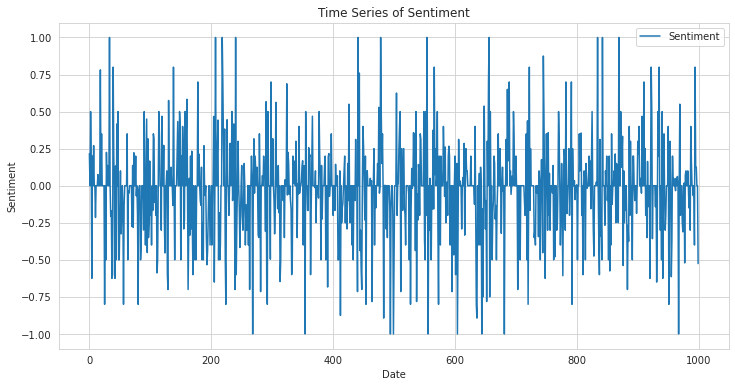

In [75]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index.to_numpy(), df['Sent'].to_numpy(), label='Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Time Series of Sentiment')
plt.legend()
plt.show()

In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [77]:
# Define ARIMA model parameters
order = (1, 0, 0)  # ARIMA order (p, d, q)

# Fit ARIMA model
model = ARIMA(df['Sent'], order=order)
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sent   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -299.351
Date:                Wed, 15 May 2024   AIC                            604.702
Time:                        15:11:42   BIC                            619.426
Sample:                             0   HQIC                           610.298
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0302      0.010     -3.018      0.003      -0.050      -0.011
ar.L1         -0.0311      0.031     -1.009      0.313      -0.091       0.029
sigma2         0.1065      0.004     28.622      0.0

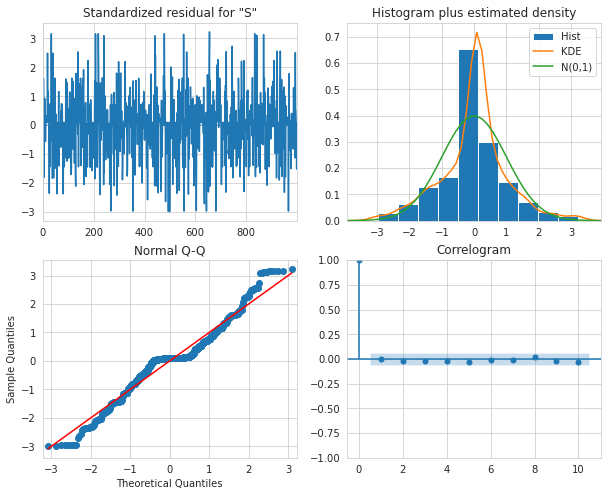

In [78]:
# Plot diagnostics of the model
results.plot_diagnostics(figsize=(10, 8))
plt.show()

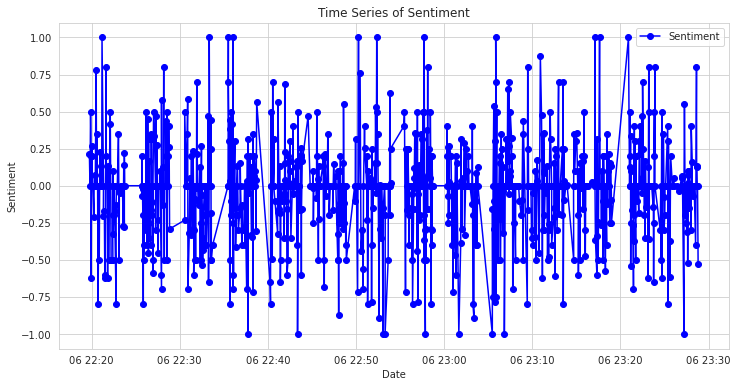

In [79]:
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].values, df['Sent'].values, label='Sentiment', linestyle='-', marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Time Series of Sentiment')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
data.head(2)


,Label,Date,Tweet,cleaned_text,cleaned_text_new,Sent,Sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats a bummer you shoulda ...,0.216667,positive
1,1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...,0.000000,neutral


In [81]:
df.head()

,Date,Sent
0,2009-04-06 22:19:45,0.216667
1,2009-04-06 22:19:49,0.000000
2,2009-04-06 22:19:53,0.500000
3,2009-04-06 22:19:57,0.200000
4,2009-04-06 22:19:57,-0.625000


In [82]:
df = data[['cleaned_text_new', 'Sentiment']]
df.head()

,cleaned_text_new,Sentiment
0,switchfoot awww thats a bummer you shoulda ...,positive
1,is upset that he cant update his facebook by t...,neutral
2,kenichan i dived many times for the ball manag...,positive
3,my whole body feels itchy and like its on fire,positive
4,nationwideclass no its not behaving at all im ...,negative


In [83]:
one_hot = pd.get_dummies(df["Sentiment"])
df.drop(['Sentiment'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

/tmp/ipykernel_13038/3881891959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Sentiment'],axis=1,inplace=True)


,cleaned_text_new,negative,neutral,positive
0,switchfoot awww thats a bummer you shoulda ...,False,False,True
1,is upset that he cant update his facebook by t...,False,True,False
2,kenichan i dived many times for the ball manag...,False,False,True
3,my whole body feels itchy and like its on fire,False,False,True
4,nationwideclass no its not behaving at all im ...,True,False,False


In [84]:
X = df['cleaned_text_new'].values
y = df.drop('cleaned_text_new', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [86]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [87]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)


Epoch 1/5


2024-05-15 15:11:53.610183: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 130886744 exceeds 10% of free system memory.
2024-05-15 15:11:53.754047: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 202768000 exceeds 10% of free system memory.
2024-05-15 15:11:54.465975: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 202768000 exceeds 10% of free system memory.
2024-05-15 15:11:55.132284: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 202768000 exceeds 10% of free system memory.
2024-05-15 15:11:55.498763: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 130886744 exceeds 10% of free system memory.


6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.3520 - loss: 1.1069 - val_accuracy: 0.3867 - val_loss: 1.0801
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5606 - loss: 0.9970 - val_accuracy: 0.5800 - val_loss: 0.9808
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9295 - loss: 0.4278 - val_accuracy: 0.5767 - val_loss: 1.2833
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9952 - loss: 0.0337 - val_accuracy: 0.5533 - val_loss: 2.1405
Epoch 4: early stopping


In [90]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.5560 - loss: 2.0964
Test accuracy: 0.5533333420753479


In [91]:
preds = model.predict(X_test)
preds

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


array([[9.59905088e-01, 3.93588059e-02, 7.36087561e-04],
       [9.99999702e-01, 2.18465686e-07, 1.43127976e-09],
       [9.99999940e-01, 3.95858279e-09, 2.88341218e-09],
       [1.76879540e-02, 9.80990946e-01, 1.32116897e-03],
       [7.20395401e-05, 1.01038948e-01, 8.98889005e-01],
       [4.05889144e-03, 9.88059998e-01, 7.88111519e-03],
       [8.81973165e-07, 7.84384191e-01, 2.15614960e-01],
       [9.87771491e-05, 9.99750614e-01, 1.50642154e-04],
       [4.02150690e-05, 2.80400086e-02, 9.71919835e-01],
       [2.51094898e-04, 9.97138262e-01, 2.61069532e-03],
       [6.36362098e-03, 9.93284702e-01, 3.51691182e-04],
       [9.23373997e-01, 7.56964609e-02, 9.29520582e-04],
       [9.99633908e-01, 3.64262989e-04, 1.82274141e-06],
       [7.70883977e-01, 1.97309569e-01, 3.18064503e-02],
       [2.16972312e-05, 9.93682027e-01, 6.29627239e-03],
       [7.59691684e-05, 3.45019966e-01, 6.54903948e-01],
       [1.07703350e-01, 5.95119782e-02, 8.32784653e-01],
       [9.99998987e-01, 9.72258

In [92]:
preds.shape

(300, 3)